# Масштабирование признаков

Часто встречаются наборы данных, в которых разные столбцы имеют разные единицы измерения: например, один столбец может быть в килограммах, а другой — в сантиметрах. Кроме того, у нас могут быть такие столбцы, как price, который может варьироваться от 1 до 300000 и даже больше, в то время как столбец weather изменяется от 29 до 71 (максимум). Таким образом, price примерно в 4000 раз больше, чем weather.

Но как мы можем быть уверены, что модель одинаково обрабатывает обе эти переменные? Когда мы подаём эти признаки в модель как есть, есть все шансы, что price больше повлияет на результат предсказания, например, года выпуска автомобиля, из-за большего значения параметра цены. Но это не обязательно означает, что данный параметр более важен как предиктор. Итак, чтобы придать значение как price, так и weather, нужно масштабирование признаков.

Для начала вспомним формулы:
* StandardScaler
   * x_stand_scaled = (x - mean) / std_dev
* MinMaxScaler
   * x_minmax_scaled = (x - x_min) / (x_max - x_min)
* RobustScaler
   * x_robust_scaled =( x - $Q_2$ ) / ($Q_3$ - $Q_1$)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

## Предобработка данных

Давайте посмотрим, как StandardScaler, MinMaxScaler и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [4]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)

## Масштабирование

In [5]:
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

In [9]:
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled.head(3)

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998


In [7]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 3.041


После применения двух других скейлеров получится следующая таблица MAE:

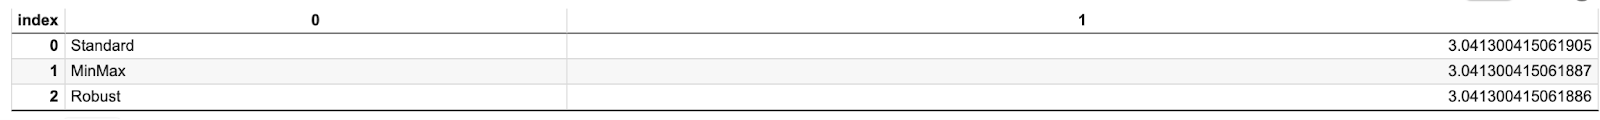

Отмасштабируем признак price с помощью RobustScaler.
В качестве ответа запишем результат выполнения кода data['price'][1]. Ответ округлим до двух знаков после точки-разделителя.

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
scaler = RobustScaler()

data_scaled[col_names] = scaler.fit_transform(x.values)

y = data_scaled['price']
x = data_scaled.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
round((data_scaled['price'][1]), 2)